<a href="https://colab.research.google.com/github/Eng-abdelhamed/Datascience_Projects/blob/main/Ford_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

First Stage of Data Processing is Data **gathering**

In [22]:
df = pd.read_csv('201904-fordgobike-tripdata.csv')

In [21]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749.0,Subscriber,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608.0,Customer,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258.0,Subscriber,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974.0,Subscriber,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877.0,Subscriber,Male,No


# data **understanding**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24369 entries, 0 to 24368
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             24369 non-null  int64  
 1   start_time               24369 non-null  object 
 2   end_time                 24369 non-null  object 
 3   start_station_id         24353 non-null  float64
 4   start_station_name       24353 non-null  object 
 5   start_station_latitude   24369 non-null  float64
 6   start_station_longitude  24369 non-null  float64
 7   end_station_id           24353 non-null  float64
 8   end_station_name         24353 non-null  object 
 9   end_station_latitude     24369 non-null  float64
 10  end_station_longitude    24368 non-null  float64
 11  bike_id                  24368 non-null  float64
 12  user_type                24368 non-null  object 
 13  member_birth_year        23136 non-null  float64
 14  member_gender         

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,24369.000000,24353.000000,24369.000000,24369.000000,24353.000000,24369.000000,24368.000000,24368.000000,23136.000000
mean,861.319135,145.411859,37.761322,-122.343349,144.483554,37.738267,-122.267370,1949.725829,1985.076677
std,2449.492682,117.185124,0.116602,0.133476,117.678664,0.943820,3.037428,1141.867717,9.992420
min,61.000000,3.000000,37.315158,-122.453704,3.000000,0.000000,-122.453704,12.000000,1896.000000
25%,363.000000,50.000000,37.769305,-122.412544,49.000000,37.769757,-122.411647,1020.000000,1981.000000
50%,577.000000,107.000000,37.780526,-122.397405,106.000000,37.780526,-122.397086,1894.000000,1988.000000
75%,909.000000,243.000000,37.797320,-122.279720,241.000000,37.798572,-122.282497,2971.000000,1992.000000
max,86114.000000,418.000000,37.880222,-121.874119,420.000000,37.880222,0.000000,4285.000000,2001.000000


In [9]:
df.describe(include = 'object')

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,24369,24369,24353,24353,24368,23136,24368
unique,24365,24368,352,356,2,3,2
top,2019-04-28 14:32:35.2510,2019-04-29 13:17:04.0920,San Francisco Caltrain Station 2 (Townsend St...,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,2,2,586,731,20331,17029,22004


In [5]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
df.shape

(24369, 16)

# **Data PreProcessing**

In [23]:
df = df.drop_duplicates()

In [18]:
(df.isna().sum() / df.shape[0] )* 100

,0
duration_sec,0.000000
start_time,0.000000
end_time,0.000000
start_station_id,0.065657
start_station_name,0.065657
start_station_latitude,0.000000
start_station_longitude,0.000000
end_station_id,0.065657
end_station_name,0.065657
end_station_latitude,0.000000


In [24]:
#  getting the Age from the Members using birthyear
df['age'] = 2019 - df['member_birth_year']

In [26]:
df.drop(['member_birth_year','start_station_latitude','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis = 1,inplace = True)

In [49]:
df.head(10)

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Start_time,end_Time,start_day,end_day,Deuratio_min
0,50305,368.0,Myrtle St at Polk St,324.0,Union Square (Powell St at Post St),2749,Subscriber,Female,No,30.0,22:33:55.155000,12:32:20.454000,Tuesday,Wednesday,838
1,53725,246.0,Berkeley Civic Center,241.0,Ashby BART Station,2608,Customer,NaN,No,NaN,20:43:41.632000,11:39:06.917000,Tuesday,Wednesday,895
2,78072,64.0,5th St at Brannan St,64.0,5th St at Brannan St,258,Subscriber,Male,No,26.0,10:32:46.489000,08:13:58.975000,Tuesday,Wednesday,1301
3,78969,67.0,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,1974,Subscriber,Male,No,47.0,10:00:51.550000,07:57:01.262000,Tuesday,Wednesday,1316
4,1128,124.0,19th St at Florida St,5.0,Powell St BART Station (Market St at 5th St),877,Subscriber,Male,No,46.0,23:59:04.739000,00:17:53.091000,Tuesday,Wednesday,18
5,1388,243.0,Bancroft Way at College Ave,247.0,Fulton St at Bancroft Way,3234,Customer,Male,No,22.0,23:53:05.982000,00:16:14.313000,Tuesday,Wednesday,23
6,920,202.0,Washington St at 8th St,220.0,San Pablo Ave at MLK Jr Way,3262,Subscriber,Male,Yes,43.0,23:57:56.340000,00:13:16.454000,Tuesday,Wednesday,15
7,725,44.0,Civic Center/UN Plaza BART Station (Market St ...,121.0,Mission Playground,2706,Customer,Male,No,46.0,23:56:11.219000,00:08:16.915000,Tuesday,Wednesday,12
8,488,21.0,Montgomery St BART Station (Market St at 2nd St),64.0,5th St at Brannan St,860,Subscriber,Male,No,33.0,23:59:00.660000,00:07:08.975000,Tuesday,Wednesday,8
9,792,28.0,The Embarcadero at Bryant St,126.0,Esprit Park,896,Subscriber,Male,No,24.0,23:53:37.604000,00:06:50.405000,Tuesday,Wednesday,13


In [34]:
# getting the Strat Time and the endtime
start_time = pd.to_datetime(df['start_time'])
end_time = pd.to_datetime(df['end_time'])

In [35]:
df['Start_time'] = start_time.dt.time
df['end_Time'] = end_time.dt.time

In [38]:
# getting the day
df['start_day']= start_time.dt.day_name()
df['end_day'] = end_time.dt.day_name()

In [41]:
# drop the unusefful columns
df.drop(['start_time','end_time'],axis = 1 , inplace = True)

In [43]:
# changig the duration secounds to minutes
df['Deuratio_min'] = df['duration_sec']/60

In [48]:
# change the data type of Duration Min to int to get rid of .
df['Deuratio_min']=df['Deuratio_min'].astype(int)

In [51]:
df.drop('duration_sec',axis = 1 , inplace = True)

In [97]:
# remove the null values in age column
df = df[df['age'].notna()]

In [99]:
df['age'] = df['age'].astype(int)

In [70]:
df.columns

Index(['start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'bike_id', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'age', 'Start_time', 'end_Time', 'start_day',
       'end_day', 'Deuratio_min'],
      dtype='object')

In [98]:
df

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,Start_time,end_Time,start_day,end_day,Deuratio_min
0,368.0,Myrtle St at Polk St,324.0,Union Square (Powell St at Post St),2749,Subscriber,Female,No,30.0,22:33:55.155000,12:32:20.454000,Tuesday,Wednesday,838
2,64.0,5th St at Brannan St,64.0,5th St at Brannan St,258,Subscriber,Male,No,26.0,10:32:46.489000,08:13:58.975000,Tuesday,Wednesday,1301
3,67.0,San Francisco Caltrain Station 2 (Townsend St...,89.0,Division St at Potrero Ave,1974,Subscriber,Male,No,47.0,10:00:51.550000,07:57:01.262000,Tuesday,Wednesday,1316
4,124.0,19th St at Florida St,5.0,Powell St BART Station (Market St at 5th St),877,Subscriber,Male,No,46.0,23:59:04.739000,00:17:53.091000,Tuesday,Wednesday,18
5,243.0,Bancroft Way at College Ave,247.0,Fulton St at Bancroft Way,3234,Customer,Male,No,22.0,23:53:05.982000,00:16:14.313000,Tuesday,Wednesday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239106,133.0,Valencia St at 22nd St,132.0,24th St at Chattanooga St,6430,Subscriber,Male,No,43.0,00:09:17.566000,00:12:22.517000,Monday,Monday,3
239107,78.0,Folsom St at 9th St,77.0,11th St at Natoma St,4972,Subscriber,Male,Yes,38.0,00:03:02.573000,00:12:02.067000,Monday,Monday,8
239108,243.0,Bancroft Way at College Ave,269.0,Telegraph Ave at Carleton St,3415,Subscriber,Male,Yes,22.0,00:06:04.237000,00:10:56.985000,Monday,Monday,4
239109,370.0,Jones St at Post St,43.0,San Francisco Public Library (Grove St at Hyde...,5018,Subscriber,Female,Yes,23.0,00:01:38.411000,00:09:29.965000,Monday,Monday,7


Some Questions I have asked it myself :


---



*   whose more gender Ride bike ?

*   Age Vs RideBike

*   Most Station Used start Trip and End Trip

*   Iss there any relation between User_Type and deuration time ?

*   What is the average trip duration for different user types?

*   Which days of the week have the highest and lowest number of trips?


*   Which bike is the most used in the day ?











# We Try To Visualize Data Visualization

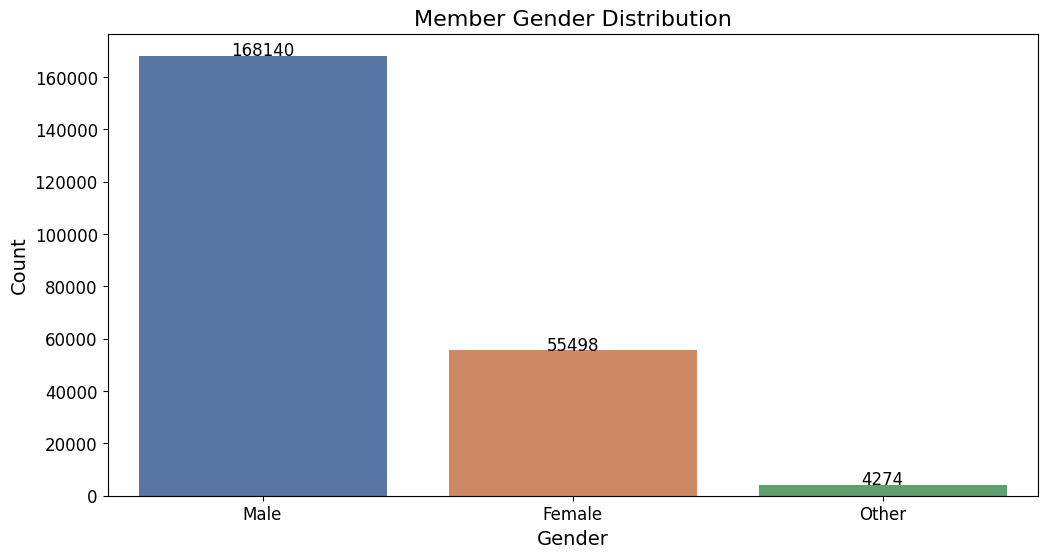

In [87]:
plt.figure(figsize=(12, 6))  # Adjusted for better visualization
plt.title('Member Gender Distribution', fontsize=16)

# Count the number of occurrences for each gender
gender_counts = df['member_gender'].value_counts()

# Plot using Seaborn
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='deep')

for i, val in enumerate(gender_counts.values):
    plt.text(i, val + 5, str(val), ha='center', fontsize=12)

plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Most Likely To See That Male Used Bikes more than Female and Others

# Age Vs RideBike

In [91]:

df['age'].value_counts().sort_values(ascending = True).head(10)

,count
age,
133.0,1
118.0,1
85.0,1
108.0,2
115.0,2
87.0,2
80.0,3
141.0,4
86.0,6


Text(0, 0.5, 'Count')

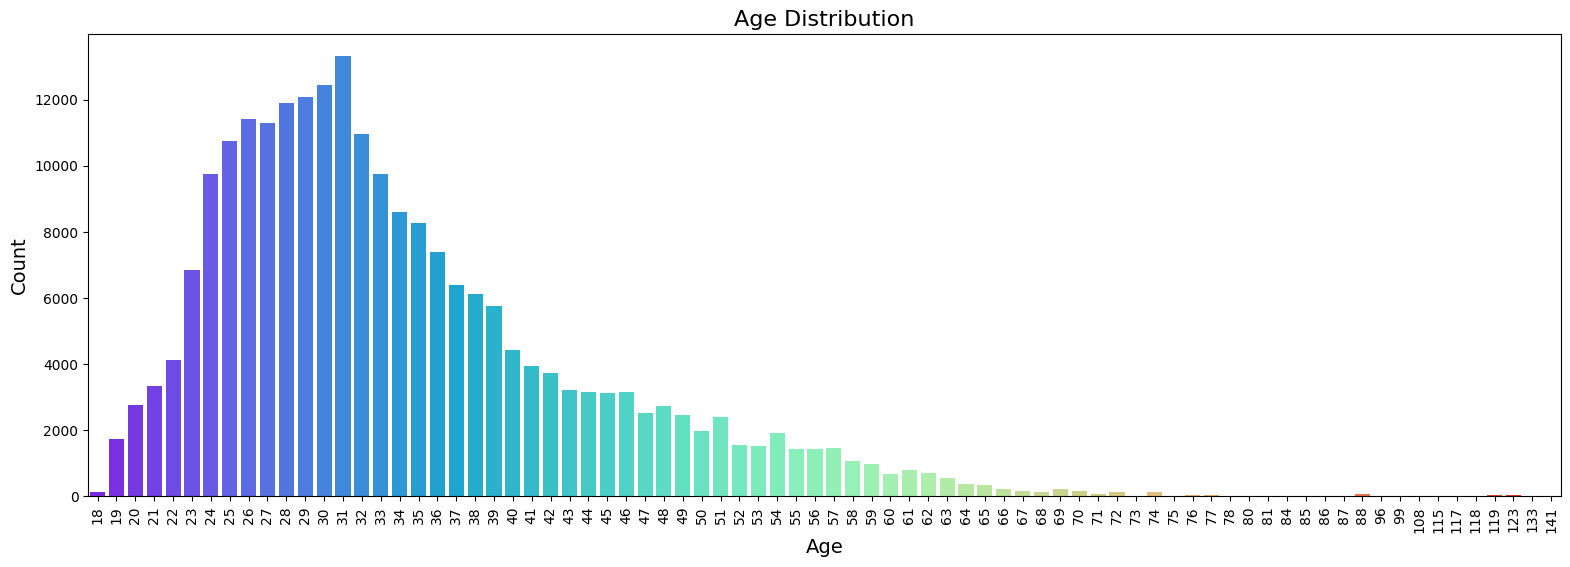

In [103]:
plt.figure(figsize=(19, 6))  # Adjusted for better visualization
plt.title('Age Distribution', fontsize=16)
plt.xticks(rotation = 90 , fontsize = 10)
sns.countplot(data = df , x = 'age' , palette='rainbow')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Most Likely that age between 27 and 32 are the Most Using Bikes

# Most Station Used start Trip and End Trip

In [121]:
df['start_station_name'].value_counts()

,count
start_station_name,
San Francisco Caltrain Station 2 (Townsend St at 4th St),4669
Market St at 10th St,4288
San Francisco Ferry Building (Harry Bridges Plaza),3919
Berry St at 4th St,3624
Montgomery St BART Station (Market St at 2nd St),3345
...,...
Auzerais Ave at Los Gatos Creek Trail,10
Farnam St at Fruitvale Ave,9
17th St at Santa Clara St,8


In [124]:
df.groupby('start_station_name')['start_station_name'].count().sort_values(ascending = False).head(10)

,start_station_name
start_station_name,
San Francisco Caltrain Station 2 (Townsend St at 4th St),4669
Market St at 10th St,4288
San Francisco Ferry Building (Harry Bridges Plaza),3919
Berry St at 4th St,3624
Montgomery St BART Station (Market St at 2nd St),3345
Powell St BART Station (Market St at 4th St),3233
San Francisco Caltrain (Townsend St at 4th St),3211
Powell St BART Station (Market St at 5th St),3179
Steuart St at Market St,3019


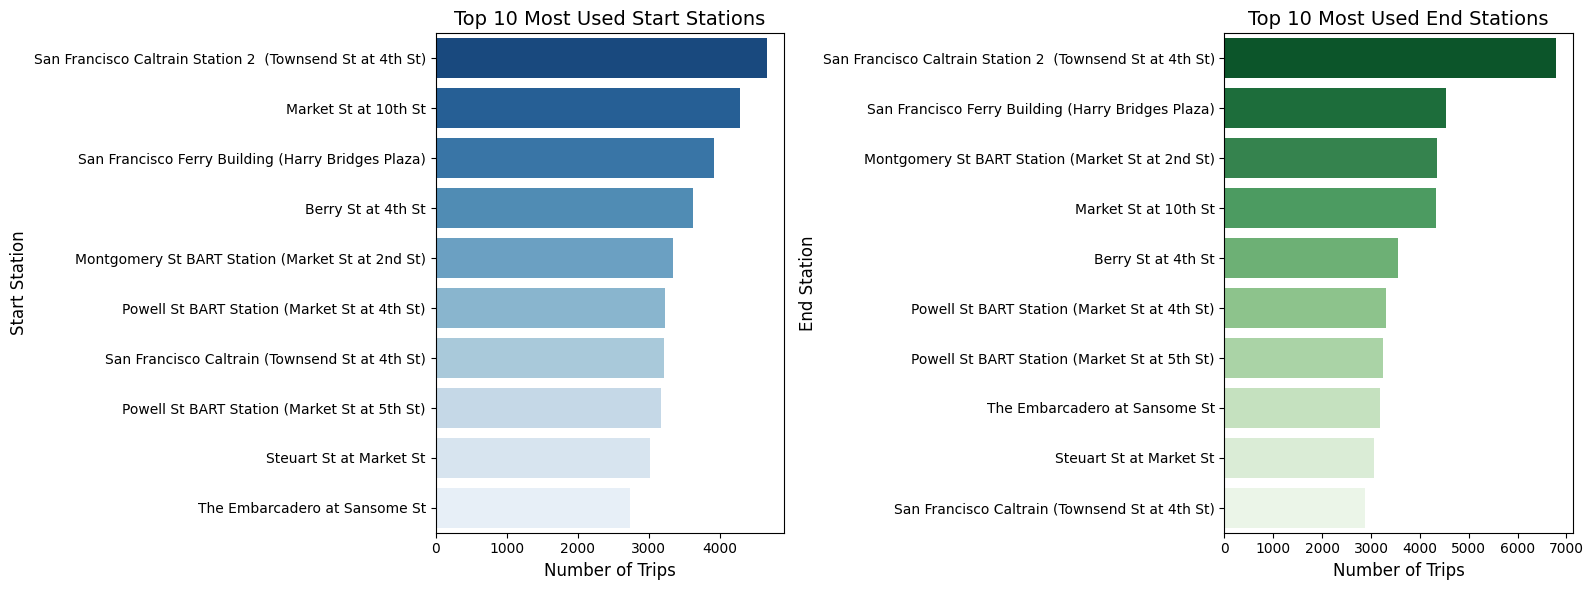

In [126]:
# Top 10 Start Stations
top_start_stations = df['start_station_name'].value_counts().head(10)

# Top 10 End Stations
top_end_stations = df['end_station_name'].value_counts().head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Most Used Start Stations
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Most Used Start Stations', fontsize=14)
axes[0].set_xlabel('Number of Trips', fontsize=12)
axes[0].set_ylabel('Start Station', fontsize=12)

# Most Used End Stations
sns.barplot(x=top_end_stations.values, y=top_end_stations.index, palette='Greens_r', ax=axes[1])
axes[1].set_title('Top 10 Most Used End Stations', fontsize=14)
axes[1].set_xlabel('Number of Trips', fontsize=12)
axes[1].set_ylabel('End Station', fontsize=12)

plt.tight_layout()
plt.show()




*   **The Most Used Start Stations is San Francisco Caltrain Station 2**

*   **The Most Used End Stations is San Francisco Caltrain Station 2**




**Iss there any relation between User_Type and deuration time ?**

<Axes: title={'center': 'detecting outliers in Duration Time'}, xlabel='Duration Time in minutes'>

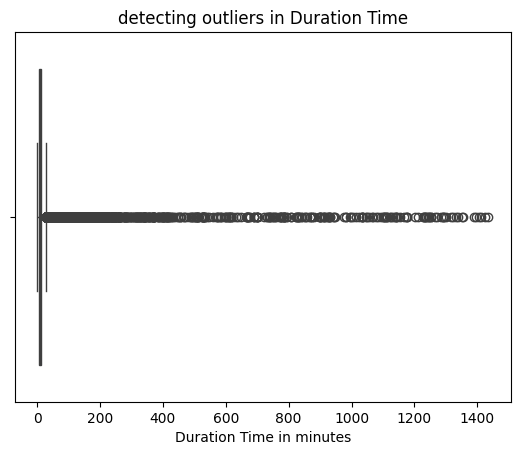

In [135]:
plt.title("detecting outliers in Duration Time")
plt.xlabel("Duration Time in minutes")
sns.boxplot(data = df , x = 'Deuratio_min')

In [142]:
val = df.groupby('user_type')['Deuratio_min'].mean()

# **Average Of Duration Time**

In [130]:
var = df['Deuratio_min'].mean()
print(f"The Mean Value of Duration Time is : {var}")

The Mean Value of Duration Time is : 12.374359401874408


# **The Mean Value of Duration Time is : 12.374359401874408**

Text(0, 0.5, '')

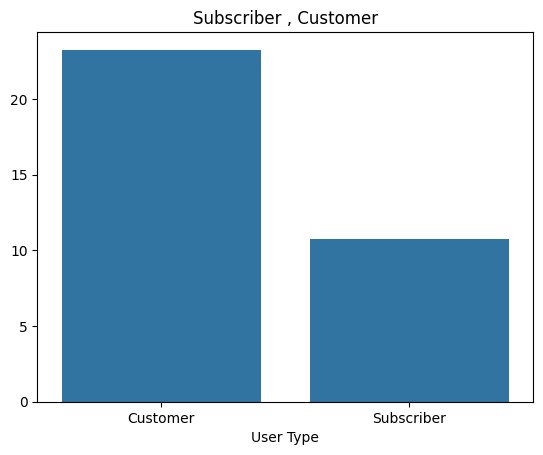

In [143]:
sns.barplot(x = val.index , y = val.values)
plt.title("Subscriber , Customer")
plt.xlabel("User Type")

In [145]:
 df_Customers = df[df['user_type'] =="Customer"]
 df_Subscriber = df[df['user_type'] =="Subscriber"]

# The Averga Duration of Each user Type

In [148]:
print(f"The Averga eDuraton time for customer : {df_Customers['Deuratio_min'].mean()}")
print(f"The Averga eDuraton time for Subscriber : {df_Subscriber['Deuratio_min'].mean()}")


The Averga eDuraton time for customer : 23.243384803754847
The Averga eDuraton time for Subscriber : 10.764510603999799


# Which days of the week have the highest and lowest number of trips?

In [149]:
df['start_day'].value_counts()

,count
start_day,
Tuesday,41865
Monday,39303
Thursday,37239
Wednesday,37224
Friday,33745
Saturday,21489
Sunday,17047


In [165]:
df['end_day'].value_counts()

,count
end_day,
Tuesday,41836
Monday,39293
Thursday,37241
Wednesday,37228
Friday,33733
Saturday,21496
Sunday,17085


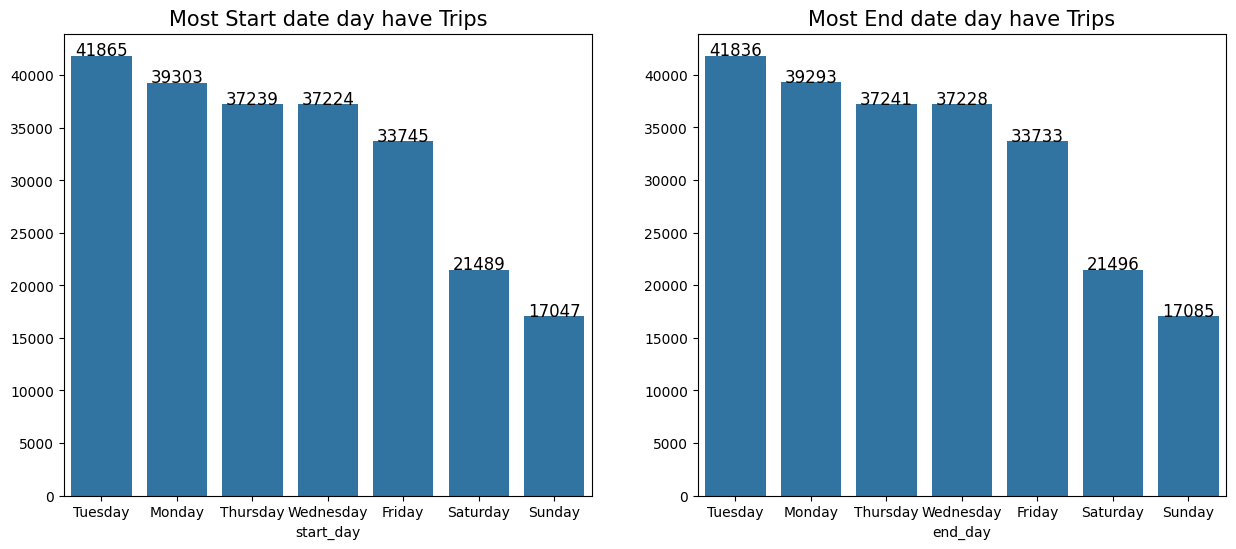

In [164]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(x = df['start_day'].value_counts().index , y = df['start_day'].value_counts().values)
plt.title("Most Start date day have Trips",fontsize = 15)

for i in range(len(df['start_day'].value_counts())):
  plt.text(i,df['start_day'].value_counts()[i] + 5,df['start_day'].value_counts()[i] , ha= 'center' , fontsize = 12)


plt.subplot(1,2,2)
sns.barplot(x = df['end_day'].value_counts().index , y = df['end_day'].value_counts().values)
for i in range(len(df['end_day'].value_counts())):
  plt.text(i,df['end_day'].value_counts()[i] + 5,df['end_day'].value_counts()[i] , ha= 'center' , fontsize = 12)

plt.title("Most End date day have Trips",fontsize = 15)

plt.show()

In [192]:
bikes_used_customer = df_Customers['bike_id'].value_counts().head(10)
bikes_used_subs = df_Subscriber['bike_id'].value_counts().head(10)

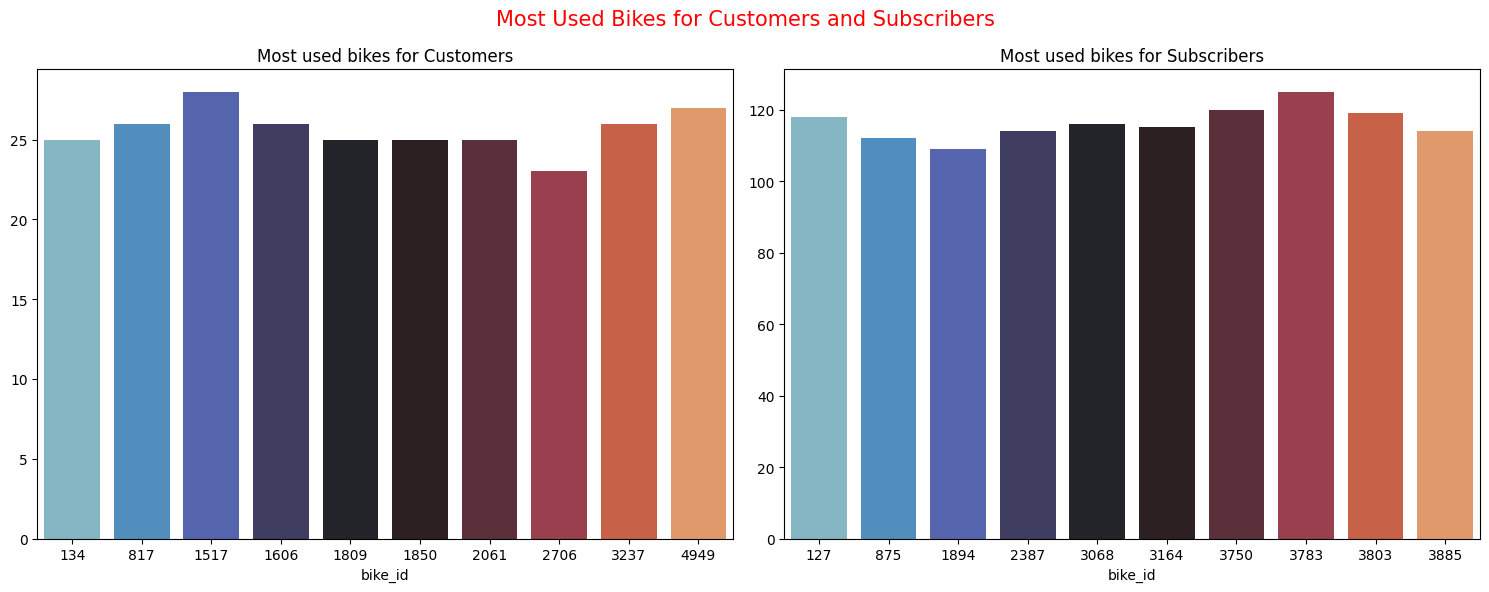

In [207]:
plt.figure(figsize = (15,6))

plt.suptitle("Most Used Bikes for Customers and Subscribers",fontsize = 15 , color = 'red')
plt.subplot(1,2,1)
plt.title("Most used bikes for Customers")
sns.barplot(x = bikes_used_customer.index , y = bikes_used_customer.values , palette = 'icefire')

plt.subplot(1,2,2)
plt.title("Most used bikes for Subscribers")
sns.barplot(x = bikes_used_subs.index , y = bikes_used_subs.values , palette = 'icefire')

plt.tight_layout()
plt.show()